In [ ]:
import numpy as np
from scipy import stats

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

In [ ]:
fp = np.array([173, 175, 180, 178, 177, 185, 183, 182], dtype=np.float64)
hp = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180], dtype=np.float64)
lf = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170], dtype=np.float64)

n1 = fp.shape[0]
n2 = hp.shape[0]
n3 = lf.shape[0]

In [ ]:
fp_mean = fp.mean()
hp_mean = hp.mean()
lf_mean = lf.mean()

fp_mean, hp_mean, lf_mean

(179.125, 178.66666666666666, 172.72727272727272)

Видно, что средние роста хокеистов и футболистов отличаются не сильно. Проверим статистическую значимость всех отличий.

In [ ]:
y = np.concatenate([fp, hp, lf])
print(y)

[173. 175. 180. 178. 177. 185. 183. 182. 177. 179. 180. 188. 177. 172.
 171. 184. 180. 172. 173. 169. 177. 166. 180. 178. 177. 172. 166. 170.]


In [ ]:
y_mean = y.mean()
y_mean

176.46428571428572

Найдём значения Sf и Sres

In [ ]:
S2_F = n1 * (fp_mean - y_mean) ** 2 + n2 * (hp_mean - y_mean) ** 2 + n3 * (lf_mean - y_mean) ** 2
S2_res = ((fp - fp_mean) ** 2).sum() + ((hp - hp_mean) ** 2).sum() + ((lf - lf_mean) ** 2).sum()
S2_F, S2_res

(253.9074675324678, 577.0568181818182)

Проверим выполнение равенства 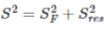

In [ ]:
S2_F + S2_res

830.964285714286

In [ ]:
((y - y_mean) ** 2).sum()

830.9642857142854

Запишем оценки дисперсий:

In [ ]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(126.9537337662339, 23.08227272727273)

Итак, значение статистики T
:

In [ ]:
T = sigma2_F / sigma2_res
T

5.500053450812598

Зафиксируем уровень значимости = 0.05
. Для него найдём критическое значение
:

In [ ]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.3851899614491687

Видим, что t больше критического значения F crit
, поэтому заключаем, что отличие среднего роста футболистов, хокеистов и штангистов действительно является статистически значимым